In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import folium

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) # display all columns, without limits

In [3]:
# Load the dataset
customers_df = pd.read_csv('dataset/olist_customers_dataset.csv')
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### **Missing Values**

In [31]:
customers_df.isna().sum() # check for missing values

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### **Duplicate Values**

In [32]:
customers_df.duplicated().sum() # check for duplicates

0

In [33]:
# remove duplicates
customers_df = customers_df.drop_duplicates()
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


### **Unique Values**

In [34]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in customers_df.columns :
    listItem.append([col, customers_df[col].nunique(), customers_df[col].sort_values().unique()])

df_uniques_per_column = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
df_uniques_per_column.sort_values('Number of Unique', ascending=False)

,Column Name,Number of Unique,Unique Sample
0,customer_id,99441,"[00012a2ce6f8dcda20d059ce98491703, 000161a058600d5901f007fab4c27140, 0001fd6190edaaf884bcaf3d49edf079, 0002414f95344307404f0ace7a26f1d5, 000379cdec625522490c315e70c7a9fb, 0004164d20a9e969af783496f3408652, 000419c5494106c306a97b5635748086, 00046a560d407e99b969756e0b10f282, 00050bf6e01e69d5c0fd612f1bcfb69c, 000598caf2ef4117407665ac33275130, 0005aefbb696d34b3424dccd0a0e9fd0, 00062b33cb9f6fe976afdcff967ea74d, 00066ccbe787a588c52bd5ff404590e3, 00072d033fe2e59061ae5c3aff1a2be5, 0009a69b72033b2d0ec8c69fc70ef768, 000bf8121c3412d3057d32371c5d3395, 000e943451fc2788ca6ac98a682f2f49, 000f17e290c26b28549908a04cfe36c1, 000fd45d6fedae68fc6676036610f879, 0010068a73b7c56da5758c3f9e5c7375, 001028b78fd413e19704b3867c369d3a, 00104a47c29da701ce41ee52077587d9, 001051abfcfdbed9f87b4266213a5df1, 00114026c1b7b52ab1773f317ef4880b, 001226b2341ef620415ce7bbafcfac28, 0012a5c13793cf51e253f096a7e740dd, 0013280441d86a4f7a8006efdaf1b0fe, 0013cd8e350a7cc76873441e431dd5ee, 001450ebb4a77efb3d68be5f7887cb1e, 00146ad30454993879adaa91c518f68c, 00155f0530cc7b2bf73cc3f81cb01c52, 001574cd5824c0b1ea90dd4f4ba6d5b8, 0015bc9fd2d5395446143e8b215d7c75, 0015f7887e2fde13ddaa7b8e385af919, 0017a0b4c1f1bdb9c395fa0ac517109c, 0018c09f333634ca9c80d9ff46e43e9c, 0018f7fde63ca77254dbc47f4ea358b2, 0019c9aaad15b043c48f0a1180f22ce8, 001a57041f56400917a187dd74e6cbc1, 001b4e9b73aa98a6276b241bfd496822, 001c7f05398c45b42eee0d5a77783bca, 001df1ee5c36767aa607001ab1a13a06, 001f150aebb5d897f2059b0460c38449, 001f35d9f262c558fd065346fbf5801d, 001f6f1a5e902ad14e1f709a7215de11, 00205ad9ba1ef4340cef86583294cf82, 002236c4f333bc8df6a5939749eb7869, 002348c1099e3229276c8ad7d4ddc702, 002408f390f729598bbac1ef9421c6ae, 002450e9ea44cb90b8a07ba0b197e149, 002554bdf9eb99618d8189c3a89fdd52, 0026955706fd4e2fa997f3f4c18d485a, 0026d252429f669d454d726e5e956aa1, 002834b4d901534f48d9e9a72047b288, 0028ff36263a86bf679df7c863a0a0ba, 002905287304e28c0218389269b4759b, 002937abdae13680e17dccd3868b4825, 0029cdf064769cabdf3186b54d068c99, 002a10e899b62a460b0116e0b68697ad, 002b24cb2cd0c3e575040dbd278885e3, 002b5342c72978cf0aba6aae1f5d5293, 002c625393dfa194828b462a6ef8cb0b, 002ce108ccf0356ef5c8b1dce3c0ae29, 002d358e2462f87678443706cbf2eb21, 002d597546b2cf44428232c9f237f873, 002ebb669a34b9e79c88efc755e95322, 002ef7e55600d44ead53f7c1644e5222, 002f067b028a3643ad3a0969c7a0f3dc, 002f90a6eb386bc43bc9ba200db31a89, 002fb8fc5ce64f8422fa2fe79986c783, 002ff70a5285669011090c077ef929af, 00302a0b99783c3d1d1e81c616e321e8, 0030aded3a67b29946a128ee8468388e, 0030fbb95fbe7e61f798a80edb01a8e9, 00314f95a054231742e3c5396b333b88, 003177b3eeca50af17750f53802c9a09, 0031abfb953b66e998f67b09e7b11375, 0031c1062edf836ef7a7a7ea758b137b, 00330644cccc5db0276fa836976306fe, 00331de1659c7f4fb660c8810e6de3f5, 0033823ee55671ac5317d423291333c2, 0034f7933de3ead6bd9ba49afe95f119, 003536ce5e18f1d12b9bf76932f8a6b1, 0035b30e58c620fa2bd30275ddd4f7ef, 0036875772a8eeb391b8cd7226283fdd, 0037d14e53af1d555a582504a4058f4c, 00380c010de38d578d02117f6d0b88e7, 0039b3e41ac6615814a0b44a8992bff5, 003a75d228dc67cb2918e40c2aacc4bf, 003b595c764773e20e0949b6fba7b1dc, 003bc8d06ebed9d146eb9f100d0a89ae, 003bdf7fd8312f9d14a4b979f3747334, 003c7cadba4f182b9f22d7d5ea7a5003, 003cb2c7ce25d8af8556fb456f903546, 003cbe6a43560a8b6fd2c07531257c2d, 003e45472805afa1ee701d83284fa22b, 003eab528664e1bd677218ef4be086ac, 003ec17a1389fa302f3a0423dddd8650, 003f7d92ac63c512bb6584219806f8df, 0040a8417928d0d5abd5169cd7877181, ...]"
1,customer_unique_id,96096,"[0000366f3b9a7992bf8c76cfdf3221e2, 0000b849f77a49e4a4ce2b2a4ca5be3f, 0000f46a3911fa3c0805444483337064, 0000f6ccb0745a6a4b88665a16c9f078, 0004aac84e0df4da2b147fca70cf8255, 0004bd2a26a76fe21f786e4fbd80607f, 00050ab1314c0e55a6ca13cf7181fecf, 00053a61a98854899e70ed204dd4bafe, 0005e1862207bf6ccc02e4228effd9a0, 0005ef4cd20d2893f0d9fbd94d3c0d97, 0006fdc98a402fceb4eb0ee528f6a8d4, 00082cbe03e478190aadbea78542e933, 00090324bbad0e9342388303bb71ba0a, 000949456b182f53c18b68d6babc79c1, 000a5ad9c4601d2bbdd9ed7

### **Customer State**

This columns shows which state of Brazil each customer are located.

| Abbreviation | State               |
|--------------|---------------------|
| AC           | Acre                |
| AL           | Alagoas             |
| AM           | Amazonas            |
| AP           | Amapá               |
| BA           | Bahia               |
| CE           | Ceará               |
| DF           | Distrito Federal    |
| ES           | Espírito Santo      |
| GO           | Goiás               |
| MA           | Maranhão            |
| MG           | Minas Gerais        |
| MS           | Mato Grosso do Sul  |
| MT           | Mato Grosso         |
| PA           | Pará                |
| PB           | Paraíba             |
| PE           | Pernambuco          |
| PI           | Piauí               |
| PR           | Paraná              |
| RJ           | Rio de Janeiro      |
| RN           | Rio Grande do Norte |
| RO           | Rondônia            |
| RR           | Roraima             |
| RS           | Rio Grande do Sul   |
| SC           | Santa Catarina      |
| SE           | Sergipe             |
| SP           | São Paulo           |
| TO           | Tocantins           |

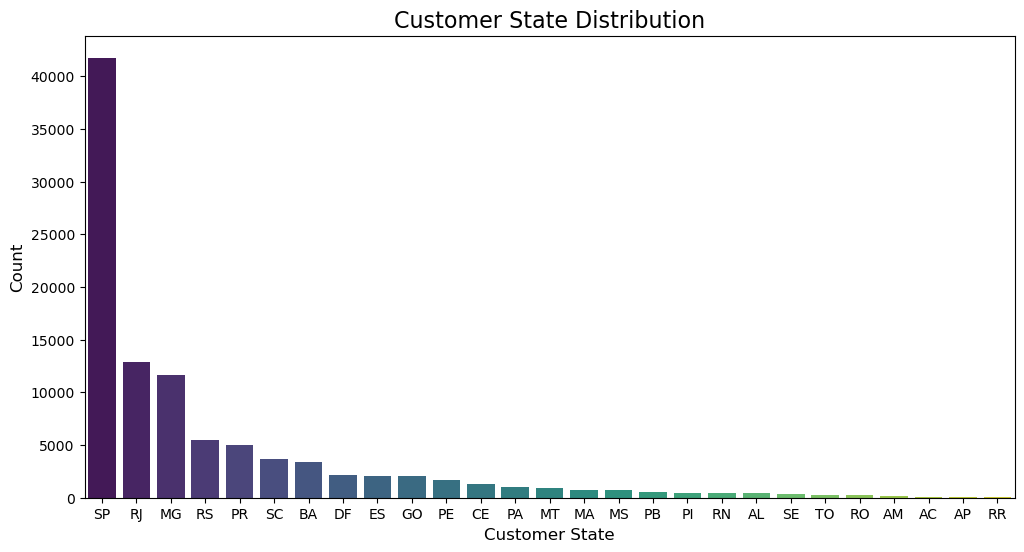

In [35]:
plt.figure(figsize=(12, 6))

state_counts = customers_df['customer_state'].value_counts().sort_values(ascending=False)

sns.countplot(data=customers_df, x='customer_state', order=state_counts.index, palette='viridis')

plt.title('Customer State Distribution', fontsize=16)

plt.xlabel('Customer State', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

### **Customer City**

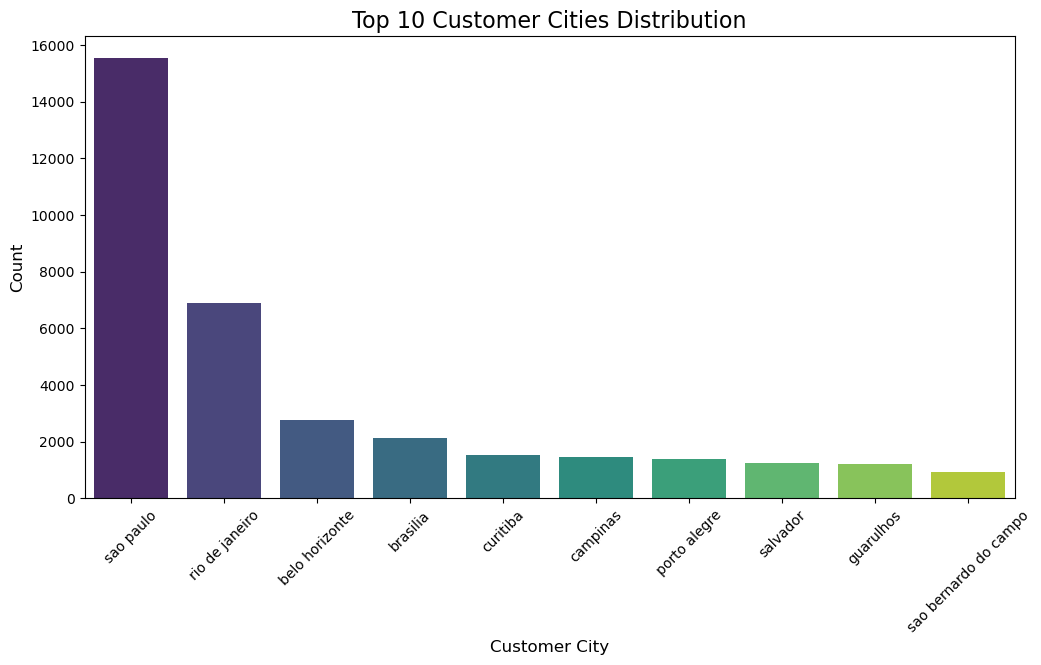

In [36]:
# count customers by city using count plot but top 10 only
top_10_cities = customers_df['customer_city'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=customers_df[customers_df['customer_city'].isin(top_10_cities)], x='customer_city', order=top_10_cities, palette='viridis')
plt.title('Top 10 Customer Cities Distribution', fontsize=16)
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()